In [107]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt

In [108]:
networkpatterns = pd.read_csv('network_traffic_data_extended.csv')
networkpatterns.head(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,Normal
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,Normal
2,2024-12-01 00:01:10,1524,9774,http,4.15,Flood
3,2024-12-01 00:00:18,3682,3911,https,60.60,Normal
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,Flood
5,2024-12-01 00:02:15,3711,7459,https,28.54,Normal
6,2024-12-01 00:05:36,206,2715,ftp,42.84,Normal
7,2024-12-01 00:02:06,2647,3627,dns,34.32,Normal
8,2024-12-01 00:00:48,6324,1684,icmp,84.90,Normal
9,2024-12-01 00:05:51,4433,811,ftp,46.48,Normal


In [109]:
networkpatterns.tail(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
8105,2024-12-23 08:00:00,4410,11341,icmp,116.97,Flood
8106,2024-12-11 05:00:00,7075,3133,https,164.85,Normal
8107,2024-12-18 19:00:00,8618,5062,http,102.18,Flood
8108,2024-12-18 09:00:00,1951,4941,icmp,30.18,Normal
8109,2024-12-23 07:00:00,6899,2162,icmp,28.15,Normal
8110,2024-12-16 10:00:00,4047,11699,tcp,49.20,Flood
8111,2024-12-20 17:00:00,6874,1240,https,100.49,Normal
8112,2024-12-15 04:00:00,10656,7533,tcp,190.19,Flood
8113,2024-12-15 16:00:00,5979,3019,https,54.42,Normal
8114,2024-12-12 22:00:00,2136,1176,tcp,48.59,Normal


In [110]:
networkpatterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8115 entries, 0 to 8114
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8115 non-null   object 
 1   bandwidth_in (kb)   8115 non-null   int64  
 2   bandwidth_out (kb)  8115 non-null   int64  
 3   jenis_probo         8115 non-null   object 
 4   ping                8115 non-null   float64
 5   label               8115 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 380.5+ KB


In [111]:
# === 1. Data Preparation ===
x_networkpatterns = networkpatterns[['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']]
y_networkpatterns = networkpatterns['label']

In [112]:
# === 2. Encode Label ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_networkpatterns)  # Flood = 1, Normal = 0

In [113]:
# Splitting Dataset menjadi Data Training dan Data Testing
X_networkpatterns_train, X_networkpatterns_test, y_networkpatterns_train, y_networkpatterns_test = train_test_split(
    x_networkpatterns, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [114]:
# Standardisasi
sc_networkpatterns = StandardScaler()
X_networkpatterns_train = sc_networkpatterns.fit_transform(X_networkpatterns_train)
X_networkpatterns_test = sc_networkpatterns.transform(X_networkpatterns_test)

In [115]:
ER_networkpatterns = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_networkpatterns_train, y_networkpatterns_train)
    y_pred = knn.predict(X_networkpatterns_test)
    ER_networkpatterns.append(1 - accuracy_score(y_networkpatterns_test, y_pred))

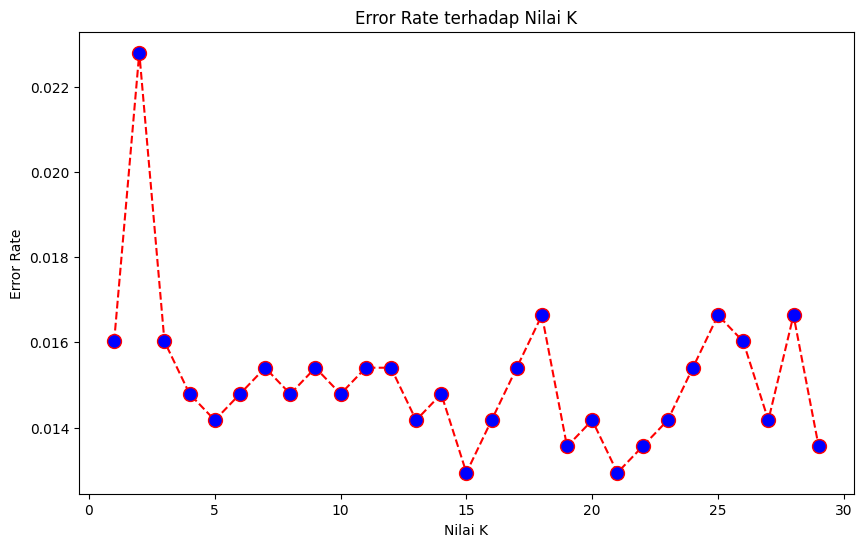

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ER_networkpatterns, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.title('Error Rate terhadap Nilai K')
plt.show()

In [182]:
# Prosedur Pelatihan Model dengan KNN
k_optimal = 23
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_networkpatterns_train, y_networkpatterns_train)
y_networkpatterns_pred = knn.predict(X_networkpatterns_test)

In [183]:
#Evaluasi Model
print(f'Akurasi dengan k = {k_optimal} : {accuracy_score(y_networkpatterns_test, y_networkpatterns_pred) * 100:.2f}%')

Akurasi dengan k = 23 : 98.58%



Confusion Matrix K 21: 


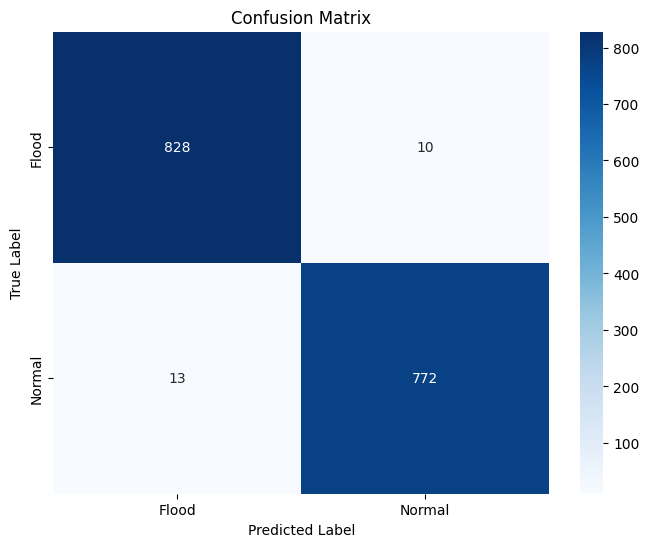

In [184]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_networkpatterns_test, y_networkpatterns_pred)

# Print Confusion Matrix
print("\nConfusion Matrix K 21: ")

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [185]:
# Classification Report
print("\nClassification Report K 21: ")
print(classification_report(y_networkpatterns_test, y_networkpatterns_pred, target_names=label_encoder.classes_))


Classification Report K 21: 
              precision    recall  f1-score   support

       Flood       0.98      0.99      0.99       838
      Normal       0.99      0.98      0.99       785

    accuracy                           0.99      1623
   macro avg       0.99      0.99      0.99      1623
weighted avg       0.99      0.99      0.99      1623



In [186]:
# Prediksi Probabilitas
print("\nProbabilitas Prediksi untuk Data Testing:")
y_prob = knn.predict_proba(X_networkpatterns_test)

# Contoh: Tampilkan probabilitas untuk 5 data pertama
for i in range(5):
    print(f"Data {i+1}:")
    print(f"  Flood: {y_prob[i][1] * 100:.2f}%")
    print(f"  Normal: {y_prob[i][0] * 100:.2f}%\n")


Probabilitas Prediksi untuk Data Testing:
Data 1:
  Flood: 100.00%
  Normal: 0.00%

Data 2:
  Flood: 26.09%
  Normal: 73.91%

Data 3:
  Flood: 0.00%
  Normal: 100.00%

Data 4:
  Flood: 0.00%
  Normal: 100.00%

Data 5:
  Flood: 0.00%
  Normal: 100.00%



In [217]:
n_epochs = 20  # Jumlah epoch untuk simulasi
accuracy_per_epoch = []

for epoch in range(n_epochs):
    # Splitting Dataset pada setiap Epoch (dengan random_state berbeda)
    X_train, X_test, y_train, y_test = train_test_split(
        x_networkpatterns, y_encoded, test_size=0.2, random_state=epoch, stratify=y_encoded)

In [219]:
 # Standardisasi
X_train = sc_networkpatterns.fit_transform(X_train)
X_test = sc_networkpatterns.transform(X_test)

In [220]:
# Pelatihan Model
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

Epoch 20/20:
  Akurasi: 98.15%
  Confusion Matrix:


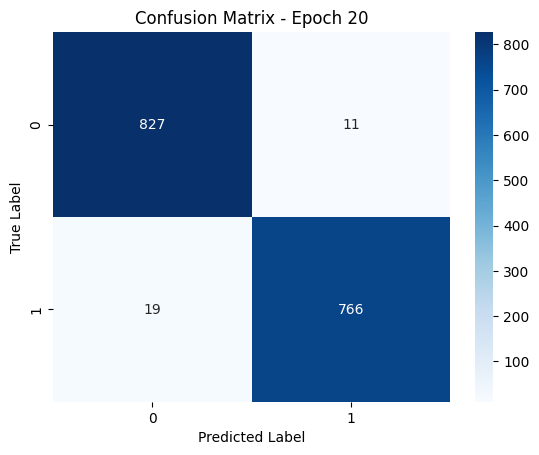

In [221]:
# Prediksi dan Evaluasi pada Epoch ini
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_per_epoch.append(accuracy)

print(f"Epoch {epoch + 1}/{n_epochs}:")
print(f"  Akurasi: {accuracy * 100:.2f}%")
print(f"  Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Epoch {epoch + 1}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [222]:
# === Statistik Hasil Epoch ===
mean_accuracy = np.mean(accuracy_per_epoch)
std_accuracy = np.std(accuracy_per_epoch)

print("\n=== Hasil Testing dengan Epoch ===")
print(f"Rata-rata Akurasi: {mean_accuracy * 100:.2f}%")
print(f"Standar Deviasi Akurasi: {std_accuracy * 100:.2f}%")


=== Hasil Testing dengan Epoch ===
Rata-rata Akurasi: 98.15%
Standar Deviasi Akurasi: 0.00%


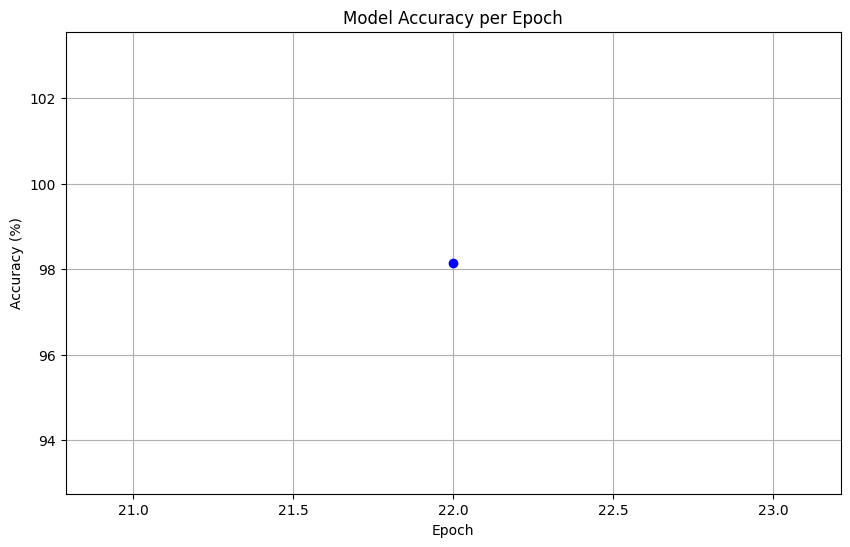

In [224]:
# Plotting Akurasi per Epoch
plt.figure(figsize=(10, 6))
plt.plot(range(22, n_epochs + 3), [acc * 100 for acc in accuracy_per_epoch], marker='o', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy per Epoch")
plt.grid()
plt.show()


=== Cross-Validation with Accuracy ===
Cross-Validation Accuracy (5-fold): [99.56869994 99.50708564 99.38385705 99.38385705 98.8909427 ]
Rata-rata Akurasi: 99.35%
Standar Deviasi Akurasi: 0.24%


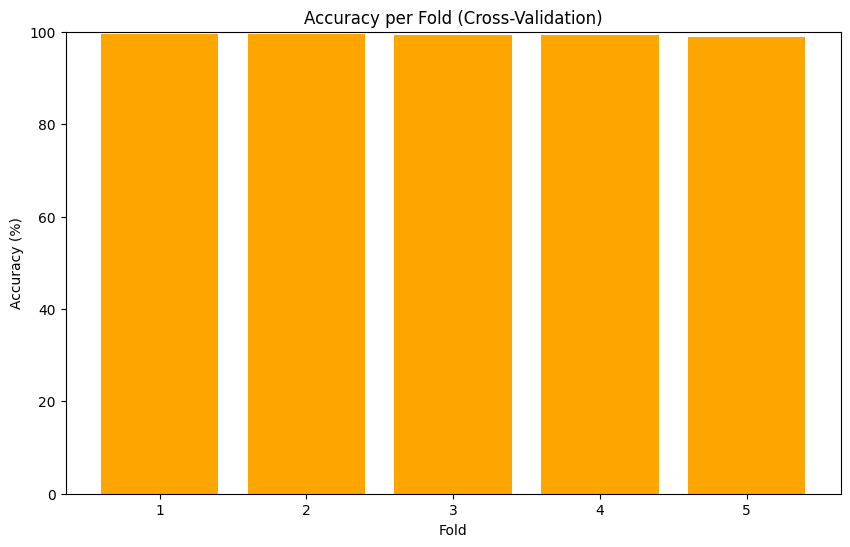

In [225]:
# === Cross-Validation with Accuracy ===
print("\n=== Cross-Validation with Accuracy ===")
# Menggunakan cross_val_score untuk mendapatkan akurasi rata-rata dari setiap fold
cv_scores = cross_val_score(knn, x_networkpatterns, y_encoded, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy (5-fold): {cv_scores * 100}")
print(f"Rata-rata Akurasi: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standar Deviasi Akurasi: {np.std(cv_scores) * 100:.2f}%")

# Plotting Akurasi Cross-Validation
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores * 100, color='orange')
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy per Fold (Cross-Validation)")
plt.ylim([0, 100])
plt.show()

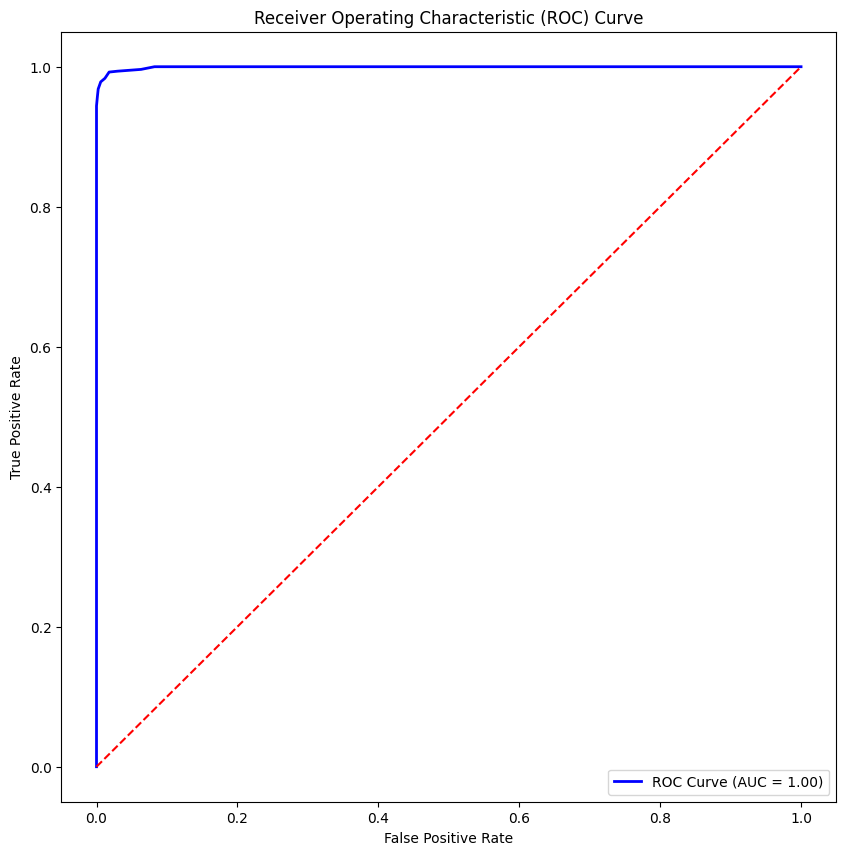

In [230]:
fpr, tpr, thresholds = roc_curve(y_networkpatterns_test, y_prob[:, 1])  # Probabilitas untuk Flood
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [227]:
# === Tuning Threshold ===
optimal_threshold = 0.5  # Anda bisa memulai dari threshold default ini


Evaluasi setelah tuning threshold:
Confusion Matrix setelah tuning threshold:


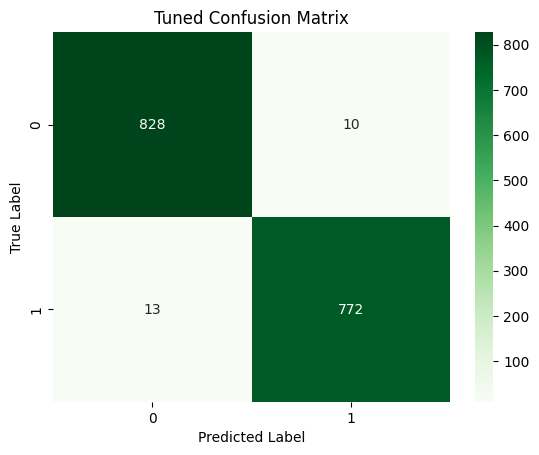

In [228]:
y_tuned_pred = (y_prob[:, 1] >= optimal_threshold).astype(int)

print("\nEvaluasi setelah tuning threshold:")
print("Confusion Matrix setelah tuning threshold:")
sns.heatmap(confusion_matrix(y_networkpatterns_test, y_tuned_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Tuned Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [229]:
print("\nClassification Report setelah tuning threshold:")
print(classification_report(y_networkpatterns_test, y_tuned_pred, target_names=label_encoder.classes_))

# Anda juga dapat mencetak akurasi setelah tuning threshold
accuracy_tuned = accuracy_score(y_networkpatterns_test, y_tuned_pred)
print(f"Akurasi setelah tuning threshold (threshold = {optimal_threshold}): {accuracy_tuned * 100:.2f}%")


Classification Report setelah tuning threshold:
              precision    recall  f1-score   support

       Flood       0.98      0.99      0.99       838
      Normal       0.99      0.98      0.99       785

    accuracy                           0.99      1623
   macro avg       0.99      0.99      0.99      1623
weighted avg       0.99      0.99      0.99      1623

Akurasi setelah tuning threshold (threshold = 0.5): 98.58%
